In [ ]:
"""

# Project Title
End-to-End Agentic AI System with Router oriented Decision Making

# Project Objective:
Key objectives are:
•	Make a route oriented Agentic AI system
•	Run this system
•	Select a tool using an LLM
•	Show how this system works as Data loading, data analysis, data visualization
•	Evaluate this system with automated pipelines.

# Main tools :
•	Python programming includes Pandas, Matplotlib, CSV dataset)
•	OpenAI (gpt-4.1-mini)
•	Data analysis
•	Routing decisions
•	code produced for Visualization
•	Agentic system (tool-oriented agent structure, routing by LLM reasoning, code generated by LLM)

# Core facts:
•	Agent controlled task handling
•	Conditional Agent Routing
•	End to end data workflow 
•	Reflecting prompt engineering

# Is this project useful in current competitive business/research market? 

Yes or no. Check skills used in this project demanding for key roles in 
•	Agentic AI Engineer
•	Prompt Engineer
•	LLM Engineer
•	Data Scientist based on LLM-environment
•	AI solutions system

# programming file
Systematic_Evaluation_Agentic_AI_Architectures.ipynb


"""

In [3]:
import os

In [5]:
# Load openai api key
from dotenv import load_dotenv

load_dotenv()

openapi_key = os.getenv('OPENAI_API_KEY')

In [7]:
import pandas as pd

data = pd.read_csv('./Store_Sales_Data.csv')
data.head()

,date,store,sku,sales,price,discount
0,2021-11-01,2001,A1,1604,5.08,0.10
1,2021-11-01,1320,B2,823,4.19,0.05
2,2021-11-01,2001,C3,1849,1.76,0.20
3,2021-11-01,2002,D4,1389,4.69,0.20
4,2021-11-01,2002,E5,1628,5.25,0.05


In [9]:
# load sales data


import pandas as pd

def load_sales_data():
    '''
    Agent Task: load_sales_data
    
    Agent Task Summary: You have good experience loading csv datasets. You are allowed to load the Store_Sales_Data.csv file. Your job is to
    provide the first few rows of the original loaded dataset.
    
    Agent Action Scenarios: You need to do the following things before analyzing and visualizing the data. 
    - Explore sales dataset blueprint
    - Inspect dataset features
    
    Output:
    str: First 5 rows of the dataset for agent tasks
    
    Agent Response:
    str: The first 5 rows of the original CSV file as a CSV content. 
    
    Setup Requirements:
    Dataset file location: ./Store_Sales_Data.csv
    CSV file should contain Organized data with readability by pandas. 
 
    '''

    try:
        data = pd.read_csv("./Store_Sales_Data.csv")
        return data.head(5).to_csv(index=False)
    
    except FileNotFoundError:
        return "FileNotFoundError: Agent cannot find the dataset file, Store_Sales_Data.csv."

In [11]:
from openai import OpenAI

In [12]:
agentic_openai_client = OpenAI()

In [13]:
agent_model_name = 'gpt-4.1-mini'

In [17]:

# sales data analysis 

def sales_data_agent_analysis (data: str, prompt: str):
    '''
    Action: sales_data_agent_analysis
    
    Agent Task Summary:
    Analyze the dataset using a prompt given by user, and an LLM
    
    Agent Applications:
    - Use natural language prompts to summarize the original data.
    - Identify the observable regular and Irregular patterns in the dataset.  
    - Before making visualizations, you need to use an LLM to find analysis outcomes
    
    Agent Inputs:
    data (str): Output from load_sales_data
    prompt (str): analyze the data using user guidelines. 
    
    Agent Output: 
    str: Analysis text output produced by the LLM


    Agent Response:
        str: Analysis results returned as a string from the Agentic AI
    '''
    
    # Make the prompt for data analysis
    agent_task_prompt = f'''Agentic AI reviewing this dataset: {data}
    
    Agent Action: {prompt}
    
    '''
    # Send agent prompt to LLM
    agent_response = agentic_openai_client.chat.completions.create(model = agent_model_name, messages = [{'role': 'user', 'content': agent_task_prompt}])
    return agent_response.choices[0].message.content
  


In [19]:

# create llm visualization code

def create_llm_visualization_code (data: str, agent_visual_instruction: str):
    '''
    Agent Operation: create_llm_visualization_code
    
    Agent Operation Overview:
    - Produce Python matplotlib visualization code instructed by CSV data and natural language visualization objectives
    - Generate Python matplotlib code as text without evaluating it.
    
    Agent Tasks:
    - Use an LLM to produce visualizations using data
    - Make visualizations before automated reporting.
    - Use an LLM to produce matplotlib charts from natural language prompts
    
    Agent Inputs:
    data (str): CSV data given to LLM for visualization which is Agent Job.
    
    agent_visual_instruction(str): 
    Agent instruction in natural language for visualization (for example, 'Plot sales with time').
    
    Agent Response:
    str: Use the LLM to generate Python matplotlib code as text. 
    
    Agent Preconditions:
    - Input CSV data is usable for pandas workflows
    - Code generated by LLM applies to matplotlib for visualizations
    - An external environment is used to run Matplotlib code.
    '''
    # Make agentic AI prompt
    agent_task_prompt = f'''Use an LLM to produce Python matplotlib code for visualizing data
    
    Dataset: {data}
    
    Agent Visualization Instruction: {agent_visual_instruction}
    
    Provide Python code only used for matplotlib evaluation
    
    '''
    # Invoke agent prompt to LLM for analysis  and visualization
    agentic_ai_response = agentic_openai_client.chat.completions.create(model= agent_model_name,
        messages=[{'role': 'user', 'content': agent_task_prompt }])

    # See Formated code
    agentic_ai_code = agentic_ai_response.choices[0].message.content

    return (agentic_ai_code.strip().replace("```python", "").replace("```", ""))


In [21]:
# Router tool mapping
router_tool_mapping = {'load_sales_data': load_sales_data, 'sales_data_agent_analysis': sales_data_agent_analysis,
         'create_llm_visualization_code': create_llm_visualization_code}


In [25]:
def agent_routing(prompt: str) -> str:
    agent_routing_prompt = f''' Take one option from three options. 
    
    User Question:'{prompt}'
    
    Options: 3 options such as loading, evaluation, graph
    
    Routing Criteria: 

    - loading for data
    - evaluation for data interpretation
    - graph for data visualization
 
    Instruction: 
    Please do not explain but provide one output from loading, evaluation, graph. At the end, you do not have right to ask any questions to user. 
    '''


    agent_route_decision = agentic_openai_client.chat.completions.create(model=agent_model_name,
                        messages=[{'role': 'user', 'content': agent_routing_prompt}])

    return agent_route_decision.choices[0].message.content.strip().lower()


In [27]:
def execute_agent_pipeline(prompt: str):
    agent_routing_option = agent_routing(prompt).lower()
    
    if 'graph' in agent_routing_option or 'plot' in agent_routing_option:
        sales_data = load_sales_data()
        plot_code = create_llm_visualization_code(sales_data, prompt)
        print(plot_code)

        try:
            exec(plot_code)                # for plot
        except Exception as exp:
            print('plot code error:', exp)

        return plot_code

    elif 'evaluat' in agent_routing_option or 'analy' in agent_routing_option:
        sales_data = load_sales_data()
        return sales_data_agent_analysis(sales_data, prompt)    # data analysis

    elif 'load' in agent_routing_option or 'csv' in agent_routing_option or 'data' in agent_routing_option:
        return load_sales_data           # for load data

    else:
        return f'Router does not work: {agent_routing_option}'



import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

data = """
date,store,sku,sales,price,discount
2021-11-01,2001,A1,1604,5.08,0.1
2021-11-01,1320,B2,823,4.19,0.05
2021-11-01,2001,C3,1849,1.76,0.2
2021-11-01,2002,D4,1389,4.69,0.2
2021-11-01,2002,E5,1628,5.25,0.05
"""

# Load data into DataFrame
df = pd.read_csv(StringIO(data), parse_dates=['date'])

# Aggregate sales by date
sales_by_date = df.groupby('date')['sales'].sum()

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(sales_by_date.index.strftime('%Y-%m-%d'), sales_by_date.values, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



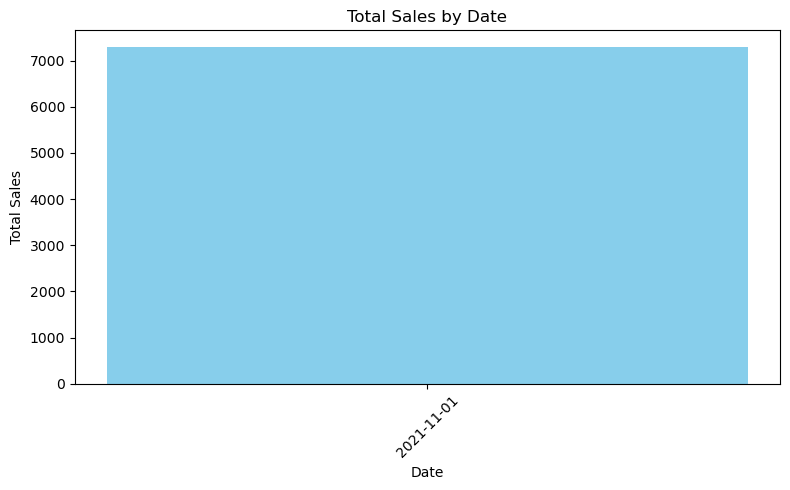


import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

data = """
date,store,sku,sales,price,discount
2021-11-01,2001,A1,1604,5.08,0.1
2021-11-01,1320,B2,823,4.19,0.05
2021-11-01,2001,C3,1849,1.76,0.2
2021-11-01,2002,D4,1389,4.69,0.2
2021-11-01,2002,E5,1628,5.25,0.05
"""

# Load data into DataFrame
df = pd.read_csv(StringIO(data), parse_dates=['date'])

# Aggregate sales by date
sales_by_date = df.groupby('date')['sales'].sum()

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(sales_by_date.index.strftime('%Y-%m-%d'), sales_by_date.values, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [31]:
pipeline_output_plot = execute_agent_pipeline("Show me the Python code for a bar graph of sales by date including a bar plot")
print(pipeline_output_plot)

In [33]:
pipeline_output_plot = execute_agent_pipeline('Have you seen some trends in the dataset? If yes, give some key points for this data.')
print(pipeline_output_plot)

Yes, I have observed some trends in the dataset. Here are some key points:

1. **Sales Volume**: The sales quantities vary significantly among products, ranging from 823 units (B2) up to 1849 units (C3). Product C3 has the highest sales in the sample.

2. **Stores**: There are three different stores represented (2001, 1320, and 2002). Store 2001 has two products (A1 and C3), with relatively high sales, especially the C3 product.

3. **Price and Discount Relationship**: 
   - Products with higher discounts (20%) like C3 and D4 do have relatively high sales volumes (1849 and 1389 respectively), suggesting discounts might be positively influencing sales.
   - Lower discount rates (5% or 10%) correlate with varied sales, indicating other factors may also impact sales.

4. **Price Range**: Prices vary from as low as $1.76 (C3) to as high as $5.25 (E5), indicating a range of product pricing in the dataset.

5. **Potential Pattern**: Products with discounts at 20% (C3, D4) have higher sales t

In [35]:
pipeline_output_plot = execute_agent_pipeline('Give some information about sales performance in this dataset.')
print(pipeline_output_plot)

Here is an overview of the sales performance in the provided dataset:

- The dataset contains sales data for 5 transactions on the same date, November 1, 2021, across 3 different stores (2001, 1320, 2002).
- The sales quantities (units sold) vary from 823 to 1849 units per SKU.
- Store 2001 has two SKUs: 
  - SKU A1 sold 1604 units at a price of $5.08 with a 10% discount.
  - SKU C3 sold 1849 units at a price of $1.76 with a 20% discount.
- Store 1320 has one SKU (B2) with 823 units sold at $4.19 and a 5% discount.
- Store 2002 has two SKUs:
  - SKU D4 sold 1389 units at $4.69 with a 20% discount.
  - SKU E5 sold 1628 units at $5.25 with a 5% discount.

Observations:
- The highest sales volume is SKU C3 (1849 units), which has the lowest price ($1.76) and the highest discount (20%) among the data.
- SKUs with higher discounts (20%) generally have relatively high sales numbers (C3 and D4).
- The store with the highest total sales volume (units) is store 2001 with 3453 units sold (1604 +